In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
boston_data = pd.read_csv('/content/BostonHousing.csv')
print(boston_data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
print(boston_data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
# Assuming the column name is 'crim' instead of 'CRIM', correct the case:
boston_data['crim'].fillna(boston_data['crim'].mean(), inplace=True)
boston_data.dropna(inplace=True)

<ipython-input-3-7f08dab42951>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boston_data['crim'].fillna(boston_data['crim'].mean(), inplace=True)


In [ ]:
print(boston_data.describe())

             crim          zn       indus        chas         nox          rm  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean     3.647414   11.402196   11.160619    0.069860    0.555151    6.284341   
std      8.637688   23.414214    6.857123    0.255166    0.116186    0.705587   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081990    0.000000    5.190000    0.000000    0.449000    5.884000   
50%      0.261690    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.693110   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  501.000000  501.000000  501.000000  501.000000  501.000000  501.000000   
mean    68.513373    3.786423    9.596806  409.143713   18.453493  356.298523   
std     28.212221    2.1033

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'medv' is the target variable and the rest are features
X = boston_data.drop('medv', axis=1)
y = boston_data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 20.687720473048476
R-squared: 0.7200277678580317


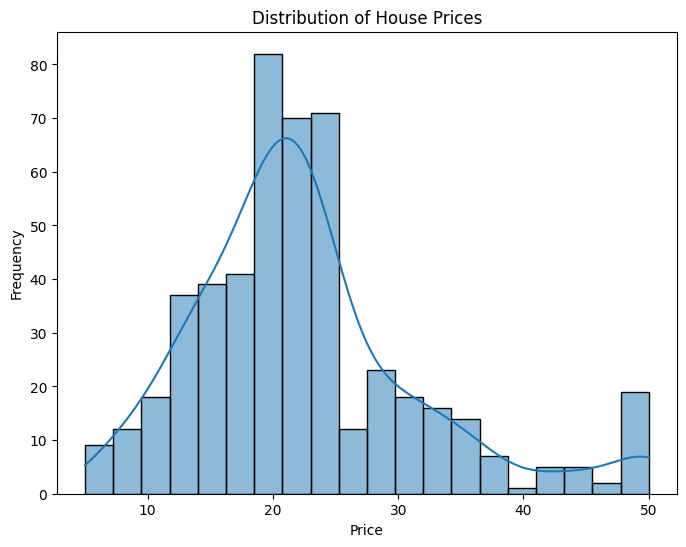

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_data['medv'], bins=20, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

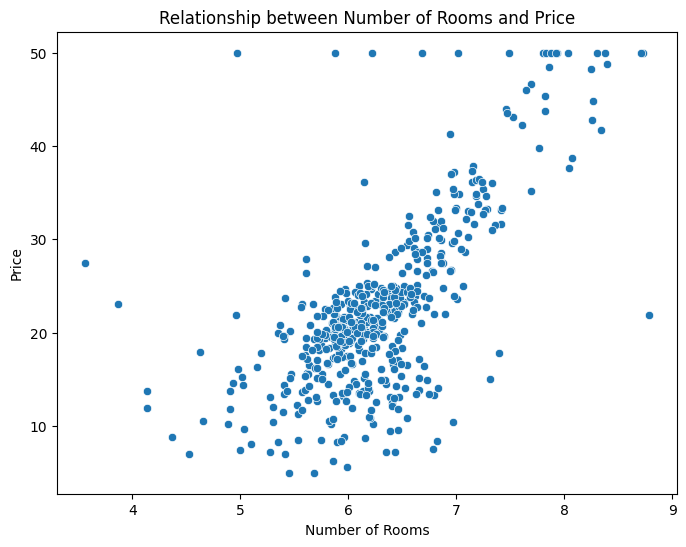

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rm', y='medv', data=boston_data)
plt.title('Relationship between Number of Rooms and Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

In [ ]:
correlation_matrix = boston_data.corr() # Change 'df' to 'boston_data'
print(correlation_matrix)
print("\nCorrelation with medv (target):")
print(correlation_matrix["medv"].sort_values(ascending=False))

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.201470  0.407544 -0.057032  0.420611 -0.219433  0.354739   
zn      -0.201470  1.000000 -0.536624 -0.043209 -0.518108  0.311173 -0.569695   
indus    0.407544 -0.536624  1.000000  0.062351  0.762937 -0.394193  0.646157   
chas    -0.057032 -0.043209  0.062351  1.000000  0.090371  0.091468  0.087384   
nox      0.420611 -0.518108  0.762937  0.090371  1.000000 -0.302751  0.732899   
rm      -0.219433  0.311173 -0.394193  0.091468 -0.302751  1.000000 -0.240286   
age      0.354739 -0.569695  0.646157  0.087384  0.732899 -0.240286  1.000000   
dis     -0.380572  0.665634 -0.709741 -0.098696 -0.771108  0.203507 -0.751500   
rad      0.624932 -0.314530  0.597721 -0.008872  0.611942 -0.210718  0.460090   
tax      0.582243 -0.315991  0.720800 -0.037146  0.666959 -0.292794  0.508338   
ptratio  0.291731 -0.392956  0.382633 -0.121830  0.188830 -0.357612  0.264496   
b       -0.384064  0.176529 

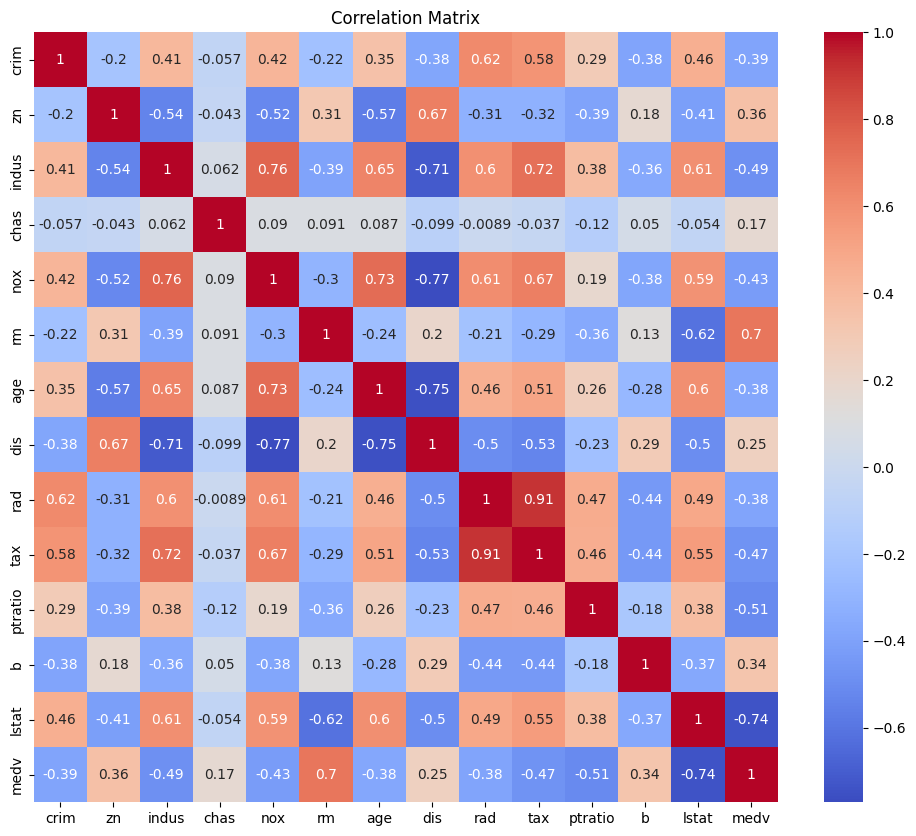

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(boston_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()